In [1]:
### Import necessary libraries
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns # Higher-level, more aesthetically pleasing plots.
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.

In [ ]:
# Load the dataset.
df_ = pd.read_csv('data/house-price-perth.csv')

In [3]:
df_.head() # Display the first few rows of the DataFrame to understand its structure and contents.

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [4]:
df_.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [5]:
# Convert prices to thousands for better readability
df_['PRICE'] = (df_['PRICE']/1000).astype(int)

In [6]:
df = df_.sample(frac=0.20, random_state=42) # Randomly sample 20% of the dataset for exploratory analysis.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,6731.0,640.351359,362.166394,51.000000,405.000000,539.000000,765.000000,2420.000000
BEDROOMS,6731.0,3.666023,0.753715,1.000000,3.000000,4.000000,4.000000,9.000000
BATHROOMS,6731.0,1.827217,0.601639,1.000000,1.000000,2.000000,2.000000,16.000000
GARAGE,6231.0,2.211042,1.173646,1.000000,2.000000,2.000000,2.000000,16.000000
LAND_AREA,6731.0,3129.171594,25214.325165,80.000000,503.000000,683.000000,846.000000,999999.000000
FLOOR_AREA,6731.0,183.618036,71.228570,1.000000,131.000000,172.000000,223.000000,751.000000
BUILD_YEAR,6122.0,1989.803986,20.909264,1868.000000,1978.000000,1995.000000,2005.000000,2017.000000
CBD_DIST,6731.0,19757.991235,11361.026111,710.000000,11150.000000,17500.000000,26700.000000,59800.000000
NEAREST_STN_DIST,6731.0,4525.230575,4577.778511,52.000000,1800.000000,3200.000000,5300.000000,35500.000000
POSTCODE,6731.0,6088.259991,63.735734,6003.000000,6036.000000,6069.000000,6148.000000,6558.000000


In [8]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')
Categorical columns: Index(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], dtype='object')


### Correlation Bar Plot

<Axes: >

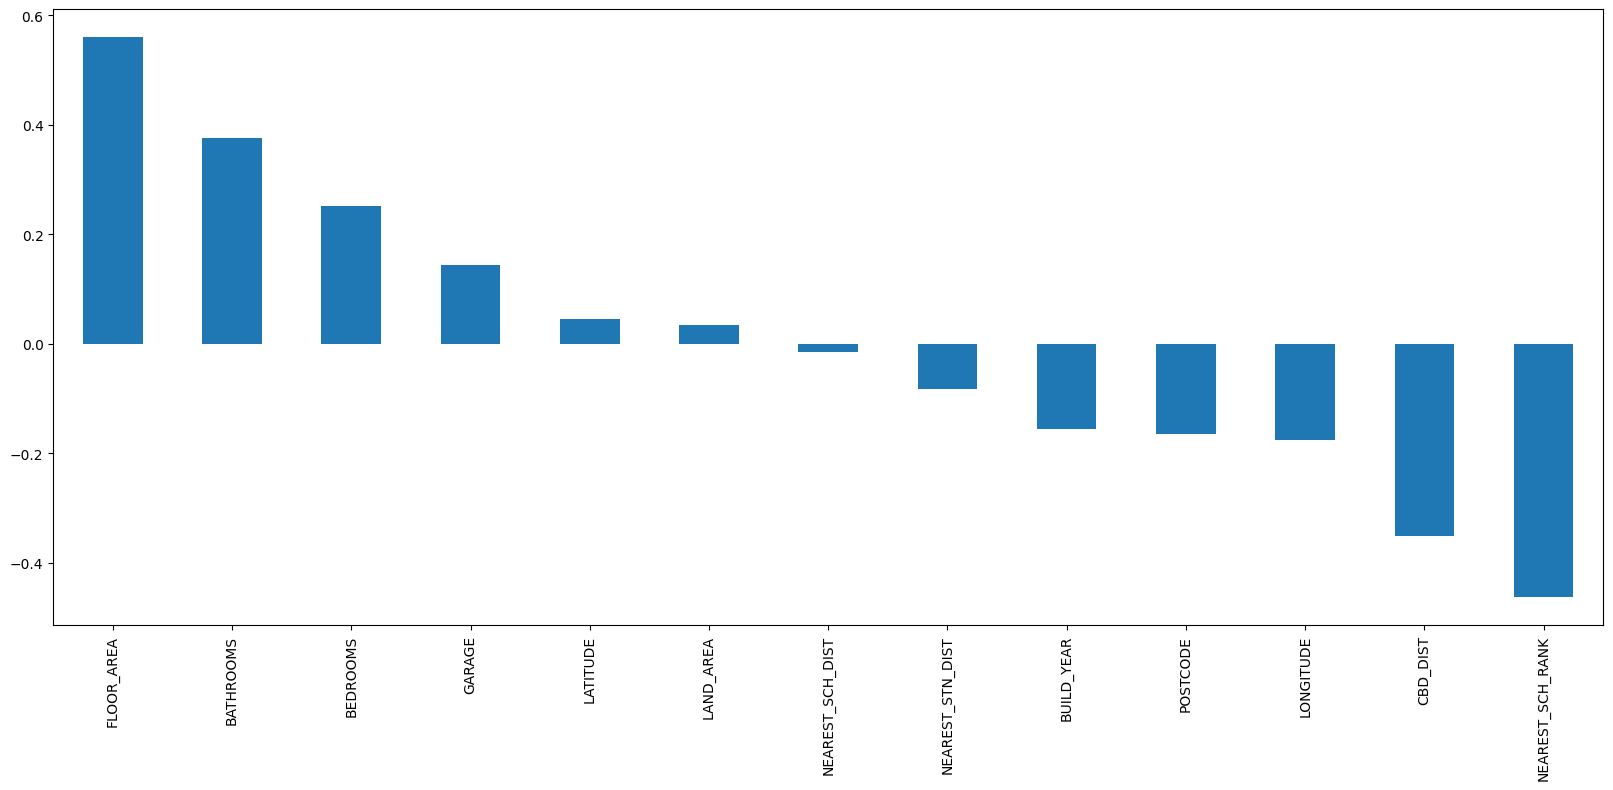

In [11]:
## Bar plot of Correlation with 'PRICE'
plt.figure(figsize=(20, 8))
df[numerical_columns].corr()['PRICE'].drop('PRICE').sort_values(ascending=False).plot(kind='bar')

### Pair Plot

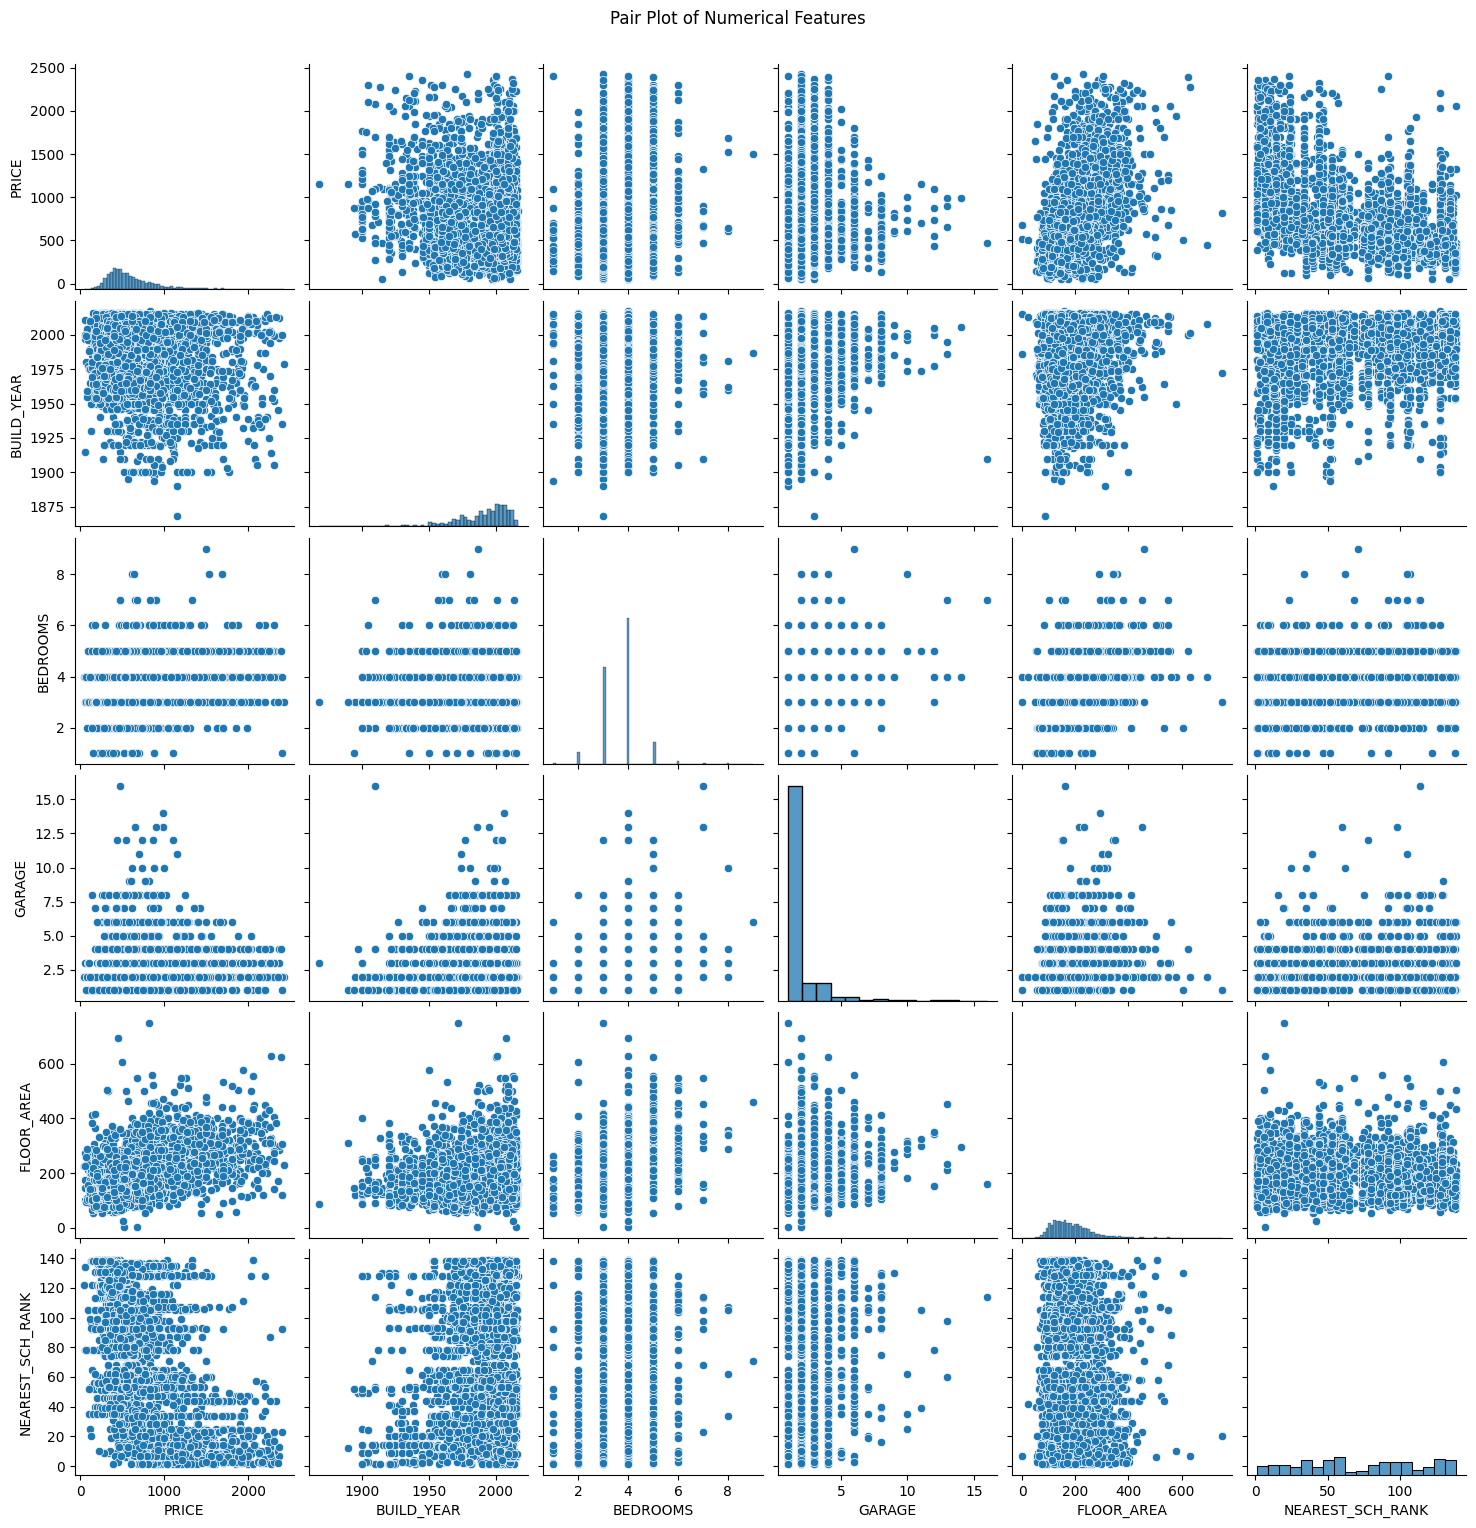

In [12]:
pair_plot = sns.pairplot(df[['PRICE', 'BUILD_YEAR','BEDROOMS', 'GARAGE', 'FLOOR_AREA', 'NEAREST_SCH_RANK']])
pair_plot.fig.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

### Line Plot

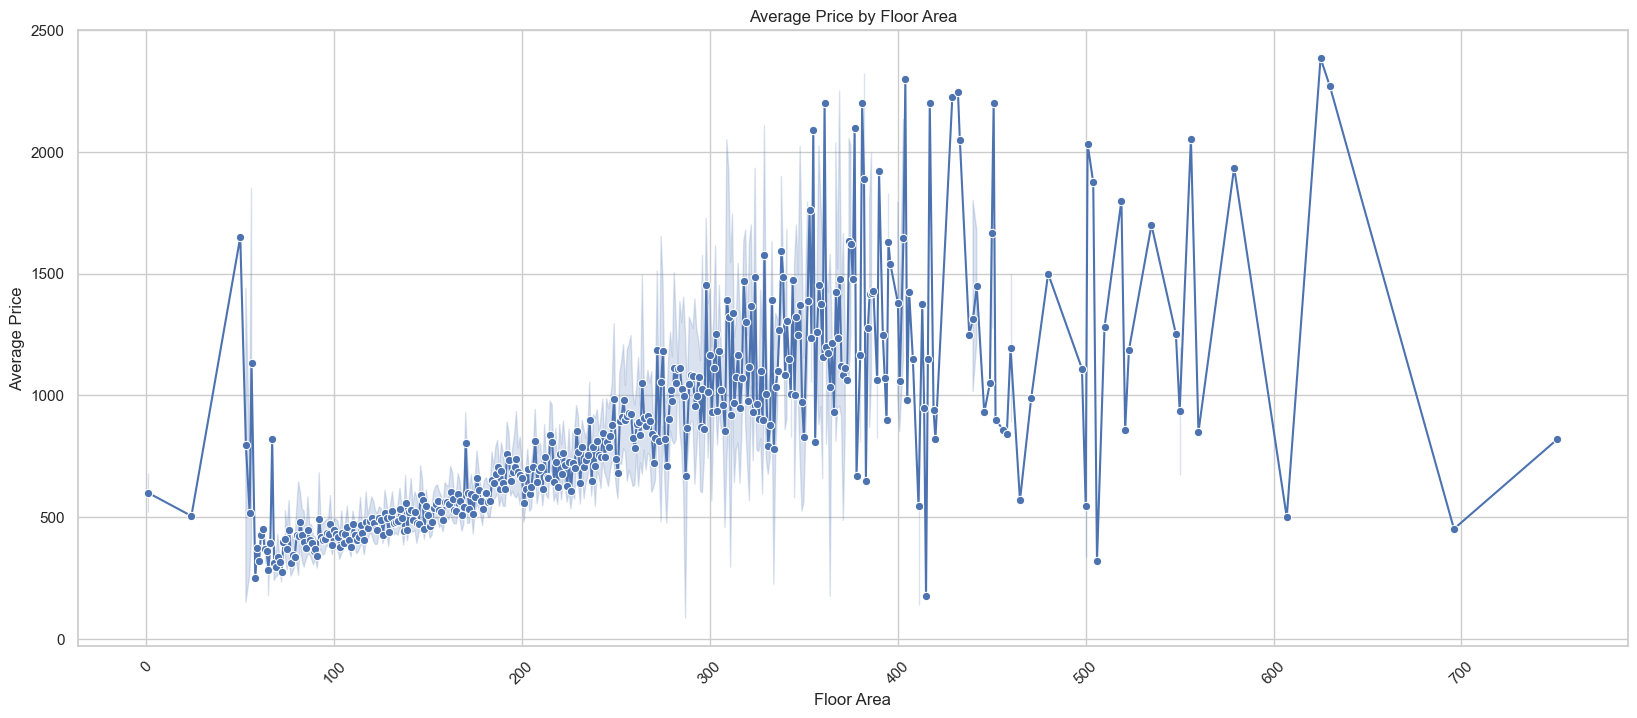

In [15]:
#build_year_df = df.groupby('BUILD_YEAR')['PRICE'].mean().reset_index()
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))
sns.lineplot(data=df, x='FLOOR_AREA', y='PRICE', marker='o')
plt.title('Average Price by Floor Area')
plt.xlabel('Floor Area')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#### Insights
- There is a clear positive relationship: as floor area increases, the average price of houses also increases.
- The increase in average price is gradual for smaller floor areas, but becomes steeper for larger floor areas.
- There is more variability in average price for houses with larger floor areas, as seen by the fluctuations and spread in the plot.
- The plot suggests that floor area is a strong predictor of house price, but other factors may also contribute to price variation, especially for larger houses.

### KDE Plot - Kernel Density Estimation

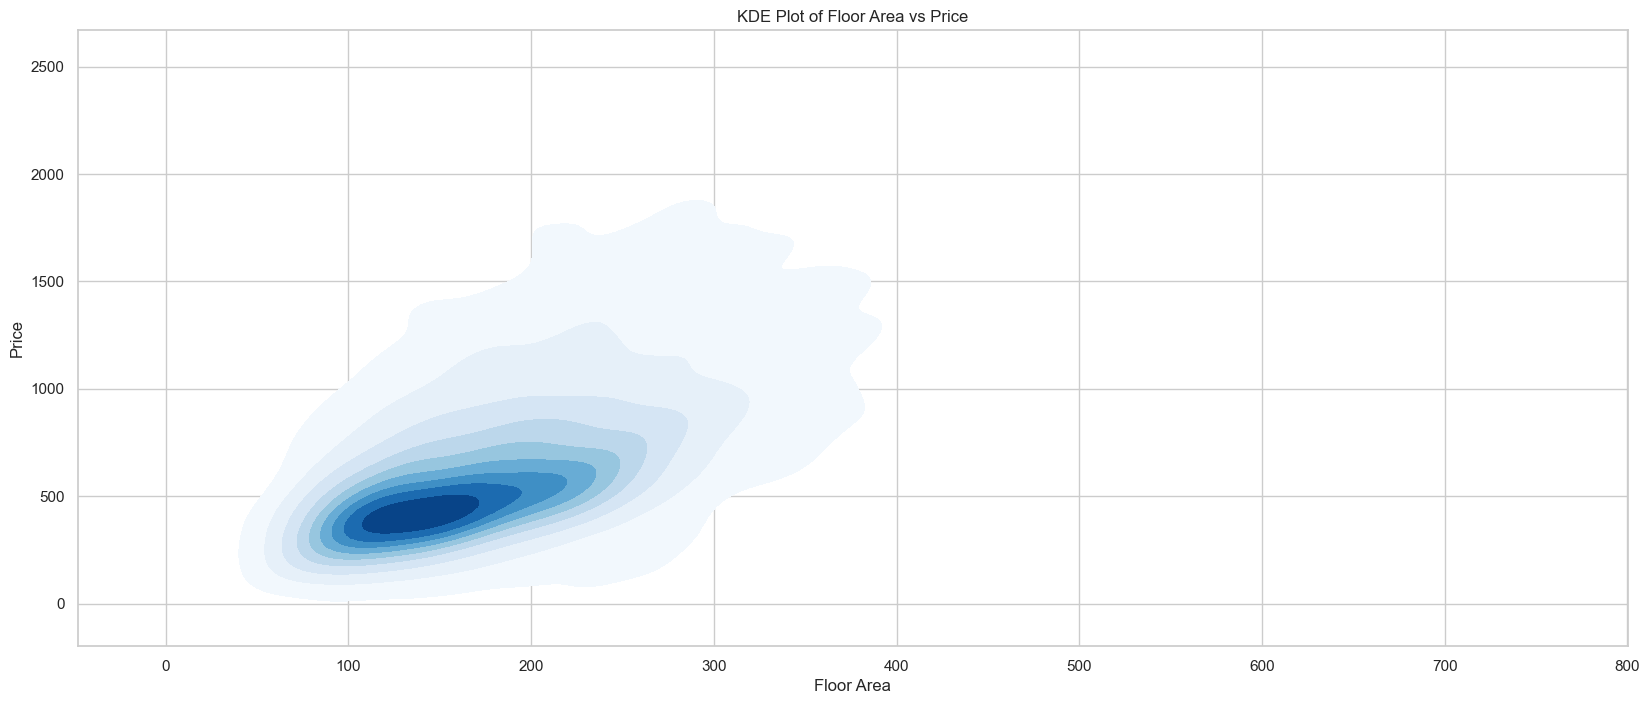

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.kdeplot(data=df, x='FLOOR_AREA', y='PRICE', cmap='Blues', fill=True, levels=10) 
plt.title('KDE Plot of Floor Area vs Price')
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.show()

#### Insights
- The darker regions indicate higher density, meaning more houses have those combinations of floor area and price.
- There is a positive relationship: as floor area increases, price tends to increase.
- The majority of data points are concentrated in the lower left region, showing that smaller houses are more common and generally less expensive.
- There are fewer houses with very large floor areas or very high prices, as shown by the lighter density in the upper right.

#### Histogram

In [26]:
df_temp = df[df['FLOOR_AREA']<701].copy()

In [27]:
df_temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRICE,6730.0,640.324666,362.186681,51.000000,405.000000,539.000000,765.000000,2420.000000
BEDROOMS,6730.0,3.666122,0.753727,1.000000,3.000000,4.000000,4.000000,9.000000
BATHROOMS,6730.0,1.827340,0.601599,1.000000,1.000000,2.000000,2.000000,16.000000
GARAGE,6230.0,2.211236,1.173640,1.000000,2.000000,2.000000,2.000000,16.000000
LAND_AREA,6730.0,3129.524814,25216.181998,80.000000,503.000000,683.000000,846.000000,999999.000000
FLOOR_AREA,6730.0,183.533730,70.897215,1.000000,131.000000,172.000000,223.000000,696.000000
BUILD_YEAR,6121.0,1989.806894,20.909733,1868.000000,1978.000000,1995.000000,2005.000000,2017.000000
CBD_DIST,6730.0,19760.302972,11360.286933,710.000000,11200.000000,17500.000000,26700.000000,59800.000000
NEAREST_STN_DIST,6730.0,4525.293759,4578.115716,52.000000,1800.000000,3200.000000,5300.000000,35500.000000
POSTCODE,6730.0,6088.265676,63.738763,6003.000000,6036.000000,6069.000000,6148.000000,6558.000000


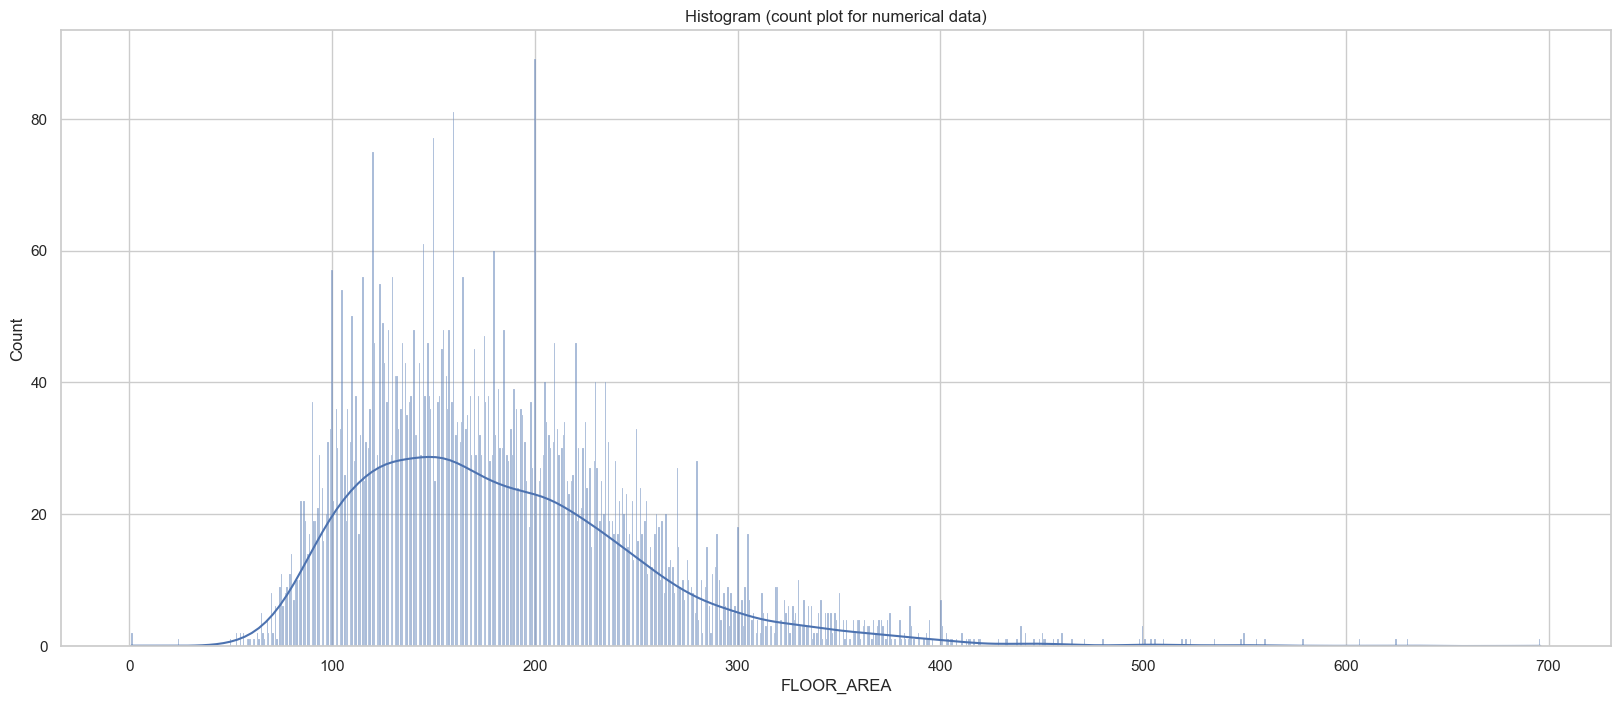

In [32]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.histplot(df_temp['FLOOR_AREA'], bins=1000, kde=True)
plt.title("Histogram (count plot for numerical data)")
plt.show()

#### Insights
- Most houses have a floor area between 100 and 200 square meters, as indicated by the tallest bar.
- Very few houses have floor areas above 400 square meters.
- The distribution is right-skewed, meaning smaller houses are much more common than larger ones.
- There is a sharp drop in count for houses with floor areas above 200 square meters.

#### Violine Plot

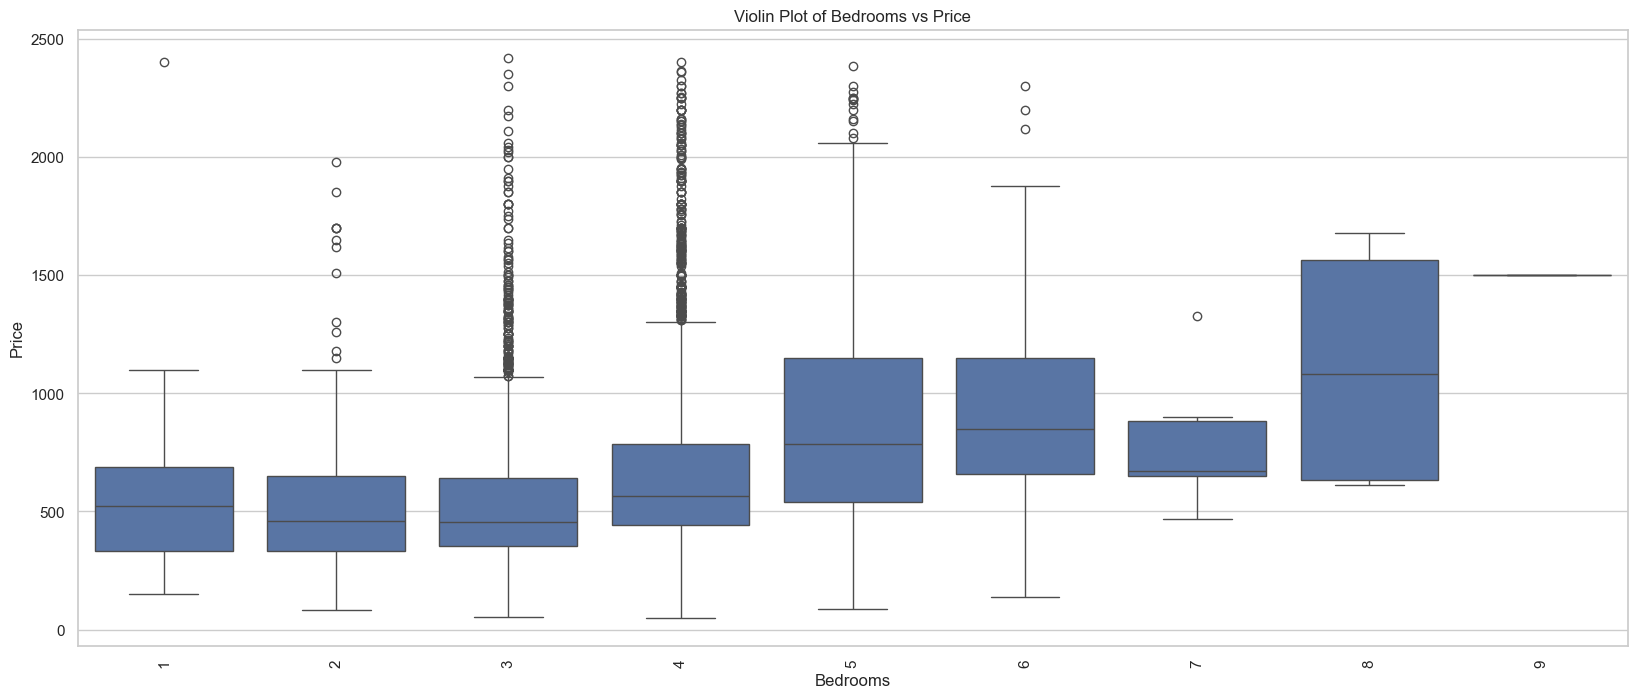

In [33]:
plt.figure(figsize=(20, 8))
#plot = sns.violinplot(data=df, x='BEDROOMS', y='PRICE', inner='quartile')
plot = sns.boxplot(data=df, x='BEDROOMS', y='PRICE')
plot.set_title('Violin Plot of Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

#### Insights
- As the number of bedrooms increases, the distribution of prices shifts higher, indicating that houses with more bedrooms tend to be more expensive.
- The spread of prices within each bedroom group increases for higher bedroom counts, showing greater variability in price for larger houses.
- The quartile lines inside each violin help compare the median and interquartile range of prices across bedroom groups.
- Some bedroom groups have long tails, suggesting the presence of outliers or a wide range of prices.
- Most houses with fewer bedrooms have lower and more consistent prices, while those with many bedrooms show higher and more variable prices.

### Pattern investigation with data cleaning

In [19]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
4372,12A Wongan Avenue,White Gum Valley,580,3,1,NaN,590,100,NaN,14400,Fremantle Station,3000,11-2015\r,6162,-32.060339,115.775488,FREMANTLE COLLEGE,1.100030,128.0
14280,25 Weld Square,Morley,387,3,1,1.0,913,112,1972.0,8300,Bayswater Station,3100,08-2019\r,6062,-31.890402,115.908252,JOHN FORREST SECONDARY COLLEGE,1.681152,74.0
27697,61 Dalton Crescent,Kingsley,785,4,2,5.0,733,258,NaN,16800,Greenwood Station,1600,07-2020\r,6026,-31.810700,115.797720,THE MONTESSORI SCHOOL,0.967021,NaN
30490,79A Moolyeen Road,Brentwood,719,4,2,2.0,350,200,2001.0,10400,Bull Creek Station,739,03-2016\r,6153,-32.045435,115.846553,CORPUS CHRISTI COLLEGE,1.331122,28.0
10378,2 Harvey Street,Peppermint Grove,2200,4,2,2.0,752,220,1999.0,10800,Cottesloe Station,719,01-2018\r,6011,-32.003590,115.761950,ST HILDA'S ANGLICAN SCHOOL FOR GIRLS,0.576187,2.0


In [20]:
# Strip whitespace and control characters like '\r'
df['DATE_SOLD'] = df['DATE_SOLD'].str.strip()

# Split on '-' and get the second part (the year)
df['SOLD_YEAR'] = df['DATE_SOLD'].str.split('-').str[1]


In [34]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,SOLD_YEAR
4372,12A Wongan Avenue,White Gum Valley,580,3,1,NaN,590,100,NaN,14400,Fremantle Station,3000,11-2015,6162,-32.060339,115.775488,FREMANTLE COLLEGE,1.100030,128.0,2015
14280,25 Weld Square,Morley,387,3,1,1.0,913,112,1972.0,8300,Bayswater Station,3100,08-2019,6062,-31.890402,115.908252,JOHN FORREST SECONDARY COLLEGE,1.681152,74.0,2019
27697,61 Dalton Crescent,Kingsley,785,4,2,5.0,733,258,NaN,16800,Greenwood Station,1600,07-2020,6026,-31.810700,115.797720,THE MONTESSORI SCHOOL,0.967021,NaN,2020
30490,79A Moolyeen Road,Brentwood,719,4,2,2.0,350,200,2001.0,10400,Bull Creek Station,739,03-2016,6153,-32.045435,115.846553,CORPUS CHRISTI COLLEGE,1.331122,28.0,2016
10378,2 Harvey Street,Peppermint Grove,2200,4,2,2.0,752,220,1999.0,10800,Cottesloe Station,719,01-2018,6011,-32.003590,115.761950,ST HILDA'S ANGLICAN SCHOOL FOR GIRLS,0.576187,2.0,2018


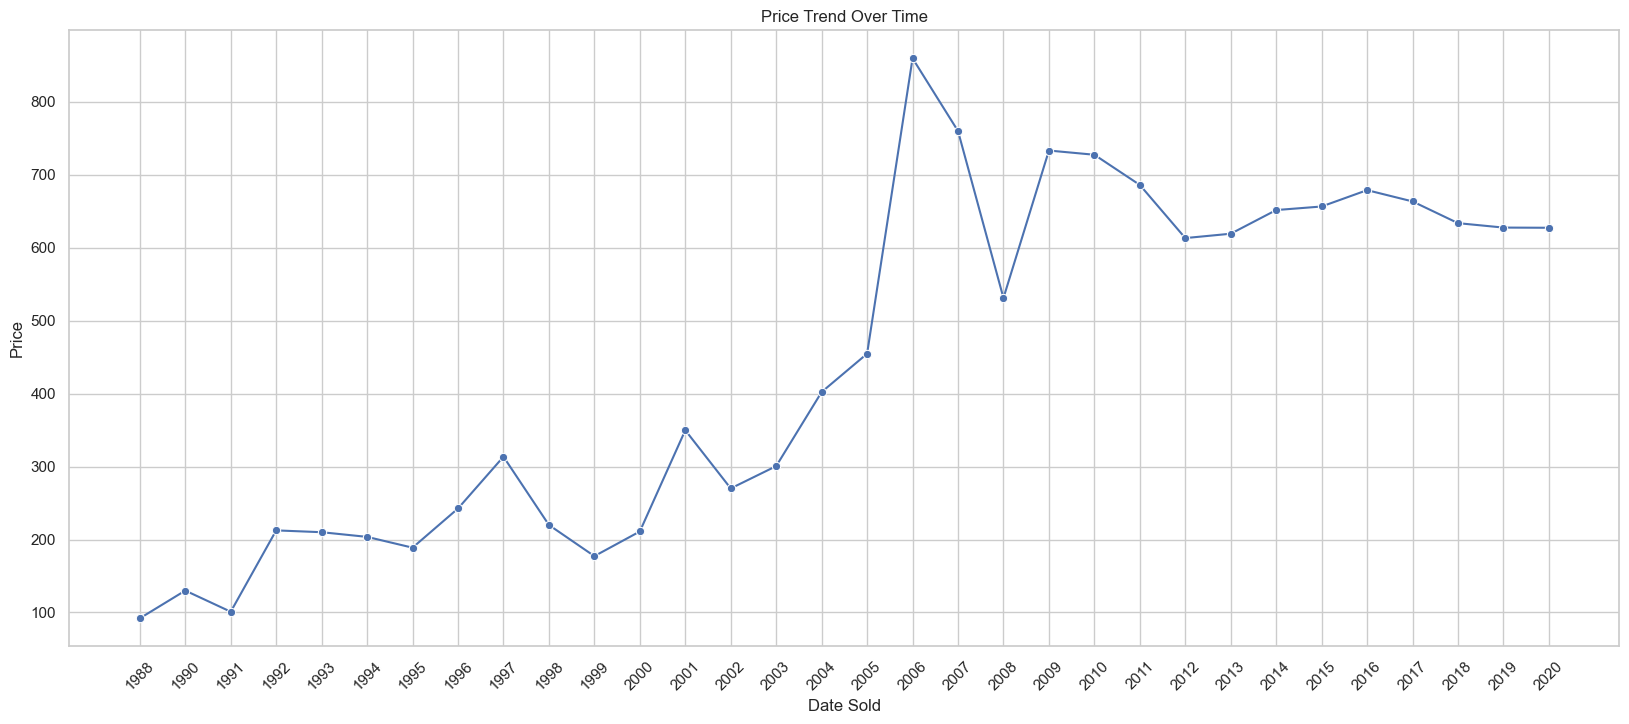

In [21]:
# price vs date sold to better understand the trend over time

avg_price_per_year = df.groupby(['SOLD_YEAR'])['PRICE'].mean().reset_index()

plt.figure(figsize=(20, 8))
sns.lineplot(data=avg_price_per_year, x='SOLD_YEAR', y='PRICE', marker='o')
plt.title('Price Trend Over Time')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [35]:
avg_price_per_year.head()

,SOLD_YEAR,PRICE
0,1988,92.0
1,1990,130.0
2,1991,101.0
3,1992,212.5
4,1993,210.0


In [23]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK', 'SOLD_YEAR'],
      dtype='object')

In [24]:
categorical_columns

Index(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], dtype='object')

### Getting Unique values in categorical columns

C:\Users\irosh\AppData\Local\Temp\ipykernel_33404\3611217051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='Set2')


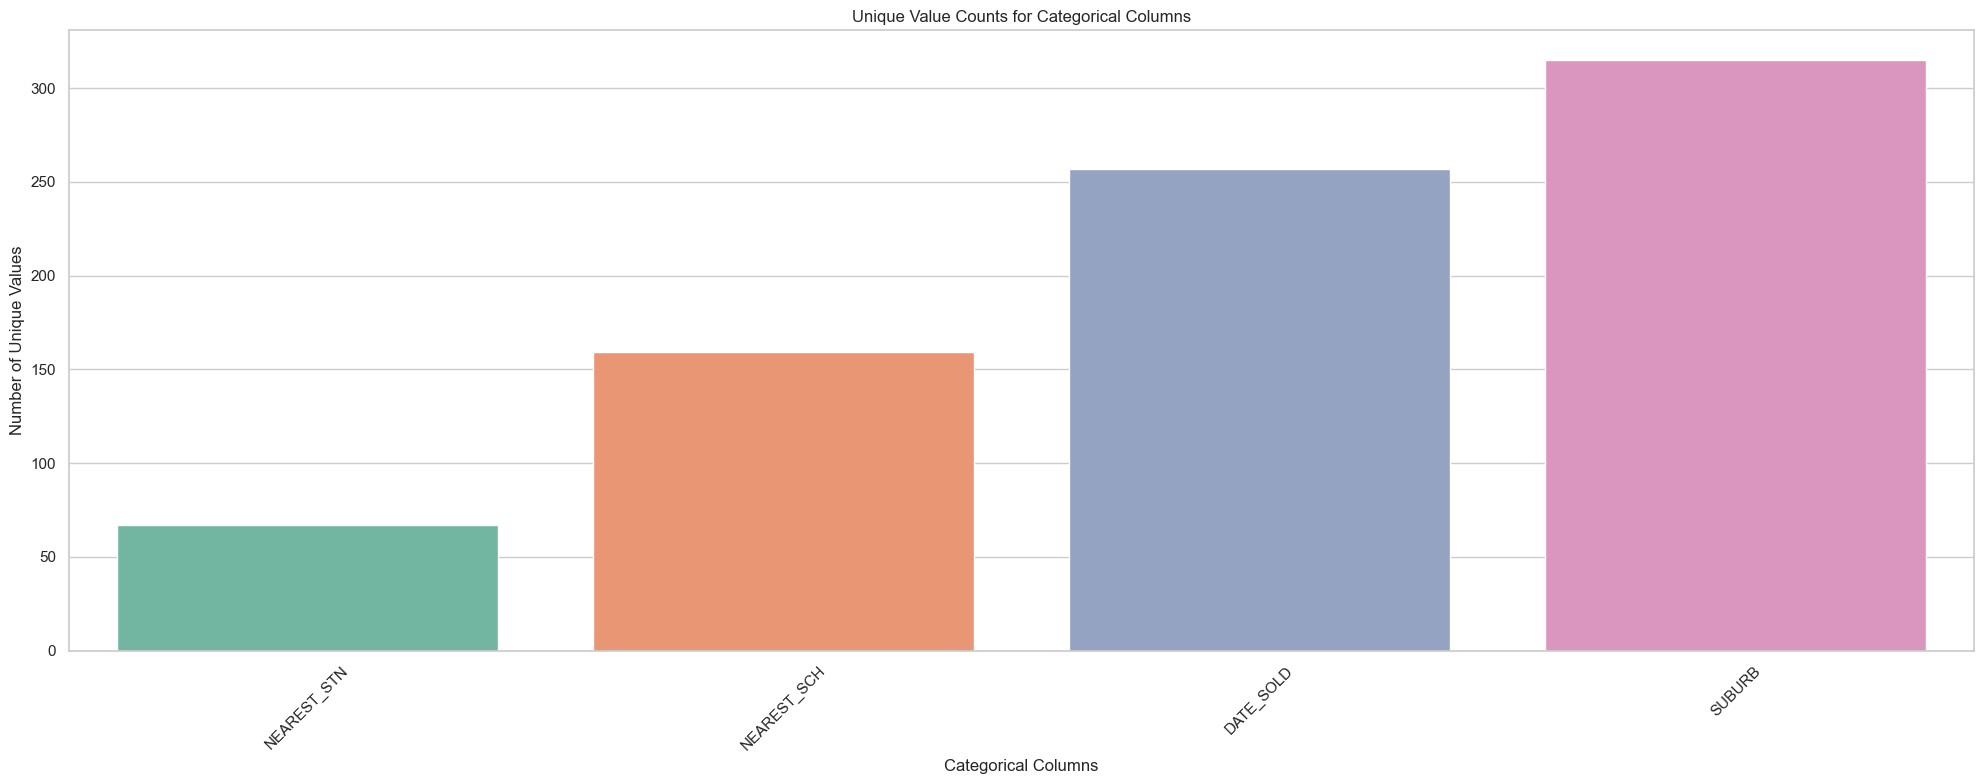

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

unique_counts = df[['SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH']].nunique().sort_values()

plt.figure(figsize=(20, 8))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='Set2')

plt.title('Unique Value Counts for Categorical Columns')
plt.xlabel('Categorical Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()